In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Danki_Tobias.helper.environment_definitions import cripple_options_evaluation, cripple_options_training

In [39]:
data_type_options = ['position', 'position_deltas', 'position_and_velocity', 'position_and_velocity_deltas']
train_on_options = ['non_crippled', 'multiple_envs']
algorithms = ['normal', 'online_adaptation', 'meta']
names = ['training_0', 'training_1', 'training_2', 'training_3', 'training_4', 'training_5',
         'eval_0', 'eval_1', 'eval_2', 'eval_3', 'eval_4', 'eval_5']

training_names = ['training_0', 'training_1', 'training_2', 'training_3', 'training_4', 'training_5']
evaluation_names = ['eval_0', 'eval_1', 'eval_2', 'eval_3', 'eval_4', 'eval_5']

def read_average_reward(data_type, train_on, algorithm, name):
    file_name = f'../data/{data_type}/on_policy/trained_on_{train_on}/{algorithm}/evaluation_{name}.txt'
    with open(file_name, "r") as file:
        file.readline()
        file.readline()
        text = file.readline()
    _, average_reward = text.split("=")
    return float(average_reward)


def read_all_rewards():
    multi_index = pd.MultiIndex.from_product([data_type_options, train_on_options, algorithms, names],
                                             names=["data_type", "train_on", "algorithm", "name"])
    rewards = []
    for data_type in data_type_options:
        for train_on in train_on_options:
            for algorithm in algorithms:
                for name in names:
                    rewards.append(read_average_reward(data_type, train_on, algorithm, name))

    all_rewards = pd.Series(rewards, index=multi_index)
    return all_rewards

def read_model_b_reset_weights():
    rewards = []
    for name in names:
        rewards.append(read_average_reward('position_and_velocity_deltas', 'multiple_envs', 'online_adaptation_reset', name))
    df = pd.Series(data=rewards, index=names)
    return df

all_rewards = read_all_rewards()
model_b_reset_weights = read_model_b_reset_weights()

# inference time is taken from txt files in data folder
inference_time = pd.Series(data = [0.04800125719471411, 0.12112758321277166, 0.11702413790495064, 0.11735528624824437],
                           index=['normal', 'online_adaptation', 'meta', 'online_adaptation_reset'])

A_color_norm = 'seagreen'
A_color_muti = 'darkseagreen'
B_color_norm = 'tomato'
B_color_muti = 'lightsalmon'
C_color_norm = 'royalblue'
C_color_muti = 'lightsteelblue'

plot comparing model b keeping weights vs weight reset

/home/danki/anaconda3/envs/SimulationFramework/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2878: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)


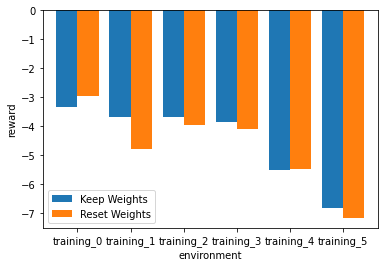

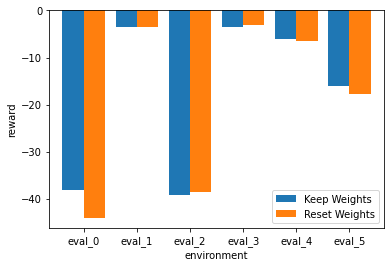

In [81]:
model_b_keep_weights = all_rewards['position_and_velocity_deltas', 'non_crippled', 'online_adaptation']
data = pd.concat([model_b_keep_weights, model_b_reset_weights], axis=1)
data.columns = ['Keep Weights', 'Reset Weights']
training_rewards = data.loc[training_names]
ax1 = training_rewards.plot(kind='bar', rot=0, width=0.8)
ax1.set_ylabel("reward")
ax1.set_xlabel("environment")
plt.savefig("../results/CompareModelBTrainingN.png")

evaluation_rewards = data.loc[evaluation_names]
ax2 = evaluation_rewards.plot(kind='bar', rot=0, width=0.8)
ax2.set_ylabel("reward")
ax2.set_xlabel("environment")
plt.savefig("../results/CompareModelBTestN.png")


Plots comparing the rewards achieved on different states

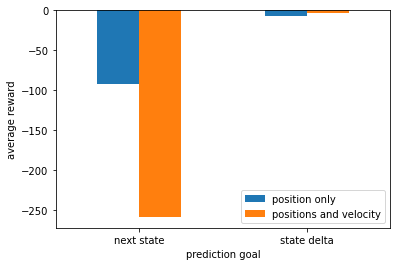

In [74]:
rewards = all_rewards[:, :, :, 'training_0']
rewards = rewards.groupby(level=[0]).mean()

multi_index = pd.MultiIndex.from_product([['next state', 'state delta'], ['position only', 'positions and velocity']],
                                             names=["prediction goal", ""])
test = [rewards['position'], rewards['position_and_velocity'],
        rewards['position_deltas'], rewards['position_and_velocity_deltas']]
data = pd.Series(test, index=multi_index)
ax = data.unstack().plot(kind='bar', rot=0)
ax.set_ylabel("average reward")
plt.savefig("../results/CompareStateDefinitionsNew.png")

Plots comparing the performance of Model A, B and C

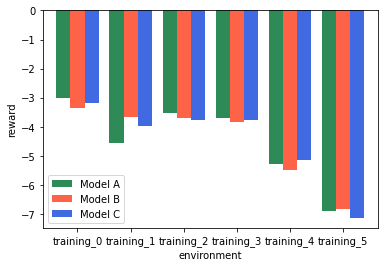

In [65]:
data = all_rewards['position_and_velocity_deltas', 'non_crippled']
data.index = data.index.set_levels(['Model C', 'Model A', 'Model B'], level=0)
data.index = data.index.set_names(['', 'environment'])
data = data.sort_index()

colors = [A_color_norm, B_color_norm, C_color_norm]
training_rewards = data.loc[:, training_names]
training_rewards = training_rewards.swaplevel(i=0, j=1, )

ax = training_rewards.unstack().plot(kind='bar', rot=0, color=colors, width=0.8)
ax.set_ylabel("reward")
plt.savefig("../results/CompareModelsTrainingNonCrippledNewC.png")

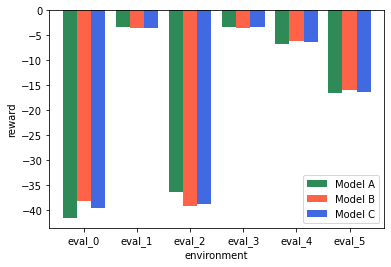

In [68]:
colors = [A_color_norm, B_color_norm, C_color_norm]
evaluation_rewards = data.loc[:, evaluation_names]
evaluation_rewards = evaluation_rewards.swaplevel(i=0, j=1, )

ax = evaluation_rewards.unstack().plot(kind='bar', rot=0, color=colors, width=0.8)
ax.set_ylabel("reward")
plt.savefig("../results/CompareModelsTestNonCrippledNewC.png")

In [ ]:
Plots comparing the performance of all Models trained on non-crippled only vs multiple_envs

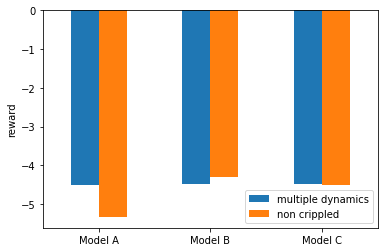

In [73]:
data = all_rewards['position_and_velocity_deltas']
data.index = data.index.set_levels(['non crippled', 'multiple dynamics'], level=0)
data.index = data.index.set_levels(['Model C', 'Model A', 'Model B'], level=1)
data.index = data.index.set_names(['','', 'environment'])
data = data.sort_index()

colors = [A_color_norm, A_color_muti, B_color_norm, B_color_muti, C_color_norm, C_color_muti]
training_rewards = data.loc[:,:, training_names]

training_rewards = training_rewards.swaplevel(i=0, j=1, )
training_rewards = training_rewards.groupby(level=[0, 1]).mean()
ax = training_rewards.unstack().plot(kind='bar', rot=0)
ax.set_ylabel("reward")
plt.savefig("../results/CompareModelsTrainingOptionsTrainingNew.png")

evaluation_rewards = data.loc[:,:, evaluation_names]

evaluation_rewards = evaluation_rewards.swaplevel(i=0, j=1, )
evaluation_rewards = evaluation_rewards.groupby(level=[0, 1]).mean()
evaluation_rewards.unstack().plot(kind='bar', rot=0)
plt.savefig("../results/CompareModelsTrainingOptionsTest.png")


In [ ]:
Plots comparing the performance of a Model trained on non-crippled only vs multiple_envs


In [ ]:
model_name = 'meta'
model_name_new = "Model C"

data = all_rewards['position_and_velocity_deltas', :, model_name]
print(data)

Plots comparing the performance of a Model trained on non-crippled only vs multiple_envs

In [ ]:
model_name = 'meta'
model_name_new = "Model C"

data = all_rewards['position_and_velocity_deltas', :, model_name]
print(data)

In [ ]:
data = all_rewards['position_and_velocity_deltas', :, :, 'training_0']


This plot shows

In [ ]:
all_rewards['position_and_velocity_deltas', :, :, 'training_0'].plot(kind='bar')

In [ ]:
all_rewards['position', 'multiple_envs', 'normal', 'alle_training_envs'].plot(kind='bar')
all_rewards['position', 'non_crippled', 'normal', 'alle_training_envs'].plot(kind='bar')
